<a href="https://colab.research.google.com/github/OscarBedford/MLCourse_Weekly_Exercises/blob/main/Exercise5_9_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analogous to task 4, but predicting continuous subject age using
KNeighborsRegressor(n_neighbors= 1…10) . Use crad[‘scorr_mean’] = 9.

In [ ]:
!pip install nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 4.3 MB/s 


In [ ]:
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
from sklearn.preprocessing import StandardScaler
import nibabel as nib
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
crad = datasets.fetch_atlas_craddock_2012()
atlas_nii = index_img(crad['scorr_mean'], 9)
masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True)
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:, 0] # gives subject age on standard units after z-scoring

/usr/local/lib/python3.7/dist-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)



Dataset created in /root/nilearn_data/oasis1



Downloaded 853254144 of 905208634 bytes (94.3%,    0.7s remaining) ...done. (12 seconds, 0 min)
Extracting data from /root/nilearn_data/oasis1/adcb228c7b26ed4f4fba93bd32bf8d97/archive_dartel.tgz..... done.
/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)



Dataset created in /root/nilearn_data/craddock_2012



 ...done. (0 seconds, 0 min)
Extracting data from /root/nilearn_data/craddock_2012/64ec9dc239add5cb58c7248a4136b852/craddock_2011_parcellations.tar.gz..... done.


In [ ]:
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# We prepare the models with the required parameters
ridge = Ridge(max_iter=1e4)
knn = KNeighborsRegressor(n_neighbors=3)

In [ ]:
# We create the iterating variable (training set size)
split = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

In [ ]:
# We pre-allocate the variables we want to populate with accuracy scores
ridge_tr_acc = []
knn_tr_acc = []

ridge_test_acc = []
knn_test_acc = []

In [ ]:
for x in split:

    X, y = input_variables, output_variable
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=(x), test_size=(0.2), shuffle=False)

    RidgeReg = ridge.fit(X_train,y_train) # We fit the ridge training model
    score_R = RidgeReg.score(X_train, y_train)
    ridge_tr_acc.append(score_R) 
    print('Ridge training accuracy: %.2f' % ((score_R))) # We print the scores

    kNN = knn.fit(X_train,y_train) # We fit the kNN training model
    score_k = kNN.score(X_train, y_train)
    knn_tr_acc.append(score_k) 
    print('kNN training accuracy: %.2f' % ((score_k))) # We print the scores

    yhat_R = ridge.predict(X_test) # We use the ridge model  to predict and store its prediction as "yhat"
    score_Rt = RidgeReg.score(X_test, y_test) 
    ridge_test_acc.append(score_Rt) # We store the scores
    print('Ridge test accuracy: %.2f' % ((score_Rt))) # We print the scores

    yhat_k = knn.predict(X_test) # We use the kNN model to predict and store its prediction as "yhat"
    score_k = kNN.score(X_test, y_test) 
    knn_test_acc.append(score_k) # We store the scores
    print('kNN test accuracy: %.2f' % ((score_k))) # We print the scores

Ridge training accuracy: 1.00
kNN training accuracy: 0.69
Ridge test accuracy: 0.28
kNN test accuracy: -0.37
Ridge training accuracy: 1.00
kNN training accuracy: 0.67
Ridge test accuracy: 0.58
kNN test accuracy: 0.21
Ridge training accuracy: 1.00
kNN training accuracy: 0.75
Ridge test accuracy: 0.60
kNN test accuracy: -0.07
Ridge training accuracy: 1.00
kNN training accuracy: 0.65
Ridge test accuracy: 0.66
kNN test accuracy: 0.34
Ridge training accuracy: 1.00
kNN training accuracy: 0.67
Ridge test accuracy: 0.46
kNN test accuracy: 0.16
Ridge training accuracy: 1.00
kNN training accuracy: 0.67
Ridge test accuracy: 0.15
kNN test accuracy: 0.49
Ridge training accuracy: 0.99
kNN training accuracy: 0.74
Ridge test accuracy: -1.86
kNN test accuracy: 0.16
Ridge training accuracy: 0.99
kNN training accuracy: 0.73
Ridge test accuracy: -0.70
kNN test accuracy: 0.10


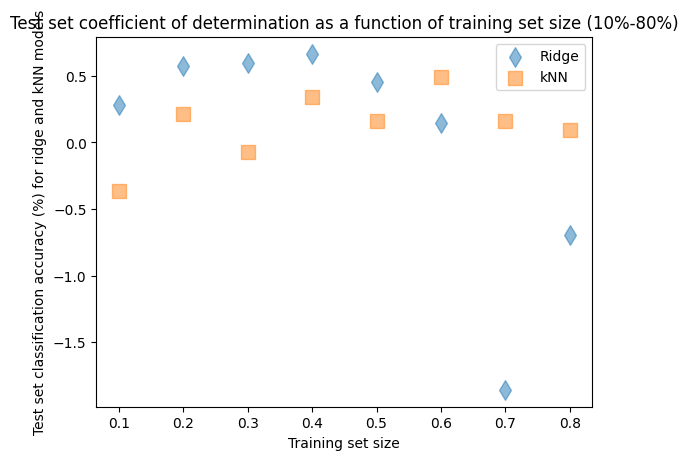

In [ ]:
# We're ready to plot
lab = ['Ridge', 'kNN']
plt.style.use("default")
plt.scatter(split,ridge_test_acc, s=100, alpha = 0.5, marker = 'd')
plt.scatter(split,knn_test_acc, s=100, alpha = 0.5, marker = 's')
plt.legend(labels=(lab))
plt.gca().set(
    title="Test set coefficient of determination as a function of training set size (10%-80%)",
    xlabel="Training set size",
    ylabel="Test set classification accuracy (%) for ridge and kNN models",
    xticks = (split)
)
plt.show()

After an inflection point in the training set size, namely 0.6, we see that the kNN model outperforms the ridge model. Just like in 5.4, it would seem that kNN (at least with k-neighbours = 3) needs a relatively large training set size to do better than ridge. 